In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [72]:
# Chargement du dataset CIFAR-10
# cifar10.load_data() renvoie les images et labels pour l'entraînement et le test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Après cette ligne:
# - x_train: tableau de shape (50000, 32, 32, 3) contenant les images d'entraînement
# - y_train: labels entiers (0-9) correspondants
# - x_test / y_test: jeu de test séparé (10000 images)


In [73]:
# Normalisation des pixels: convertir de [0,255] à [0.0,1.0]
# Cela aide le modèle à converger plus rapidement et stabilise l'entraînement.
x_train = x_train / 255.0
x_test = x_test / 255.0
# Après cela, chaque valeur de pixel est un float entre 0 et 1.


In [81]:
# Création du modèle CNN simple
# Sequential = empiler les couches dans l'ordre
# Input(shape=...) est la première couche pour déclarer explicitement la forme des entrées
from tensorflow.keras import Input

model = Sequential([
    # Déclaration explicite de la forme d'entrée (32x32x3)
    Input(shape=(32, 32, 3)),
    # 1ère couche convolutionnelle: 80 filtres 3x3, activation ReLU
    Conv2D(80, (3, 3), activation='relu'),
    # MaxPooling réduit la taille spatiale (downsampling) pour extraire les caractéristiques principales
    MaxPooling2D((2, 2)),
    # 2ème couche convolutionnelle: 32 filtres 5x5
    Conv2D(32, (5, 5), activation='relu'),
    # Nouveau pooling pour réduire encore la dimension
    MaxPooling2D((2, 2)),
    # Flatten transforme les feature maps 2D en vecteur 1D pour les couches denses
    Flatten(),
    # Couche entièrement connectée (dense) avec 64 neurones et ReLU
    Dense(64, activation='relu'),
    # Couche de sortie: 10 neurones (une par classe) avec softmax pour probabilités
    Dense(10, activation='softmax')
])

# Compilation du modèle: configuration de l'entraînement
# optimizer='adam': algorithme d'optimisation adaptatif, bon choix par défaut
# loss='sparse_categorical_crossentropy': adaptée aux labels entiers (0..9)
# metrics=['accuracy']: on surveille l'exactitude pendant l'entraînement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Callbacks: checkpoint, early stopping, reduce LR
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Re-train (plus d'epochs; arrêt précoce contrôlera la durée)
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, earlystop, reduce_lr]
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3261 - loss: 1.8323

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.4158 - loss: 1.6086 - val_accuracy: 0.4865 - val_loss: 1.4425 - learning_rate: 0.0010
Epoch 2/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5309 - loss: 1.3203

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5415 - loss: 1.2881 - val_accuracy: 0.5525 - val_loss: 1.2383 - learning_rate: 0.0010
Epoch 3/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5790 - loss: 1.1924

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5848 - loss: 1.1770 - val_accuracy: 0.5918 - val_loss: 1.1502 - learning_rate: 0.0010
Epoch 4/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6160 - loss: 1.1013

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6136 - loss: 1.1010 - val_accuracy: 0.6053 - val_loss: 1.1222 - learning_rate: 0.0010
Epoch 5/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6361 - loss: 1.0450

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6342 - loss: 1.0452 - val_accuracy: 0.6149 - val_loss: 1.0915 - learning_rate: 0.0010
Epoch 6/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6495 - loss: 0.9990

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6510 - loss: 0.9995 - val_accuracy: 0.6236 - val_loss: 1.0706 - learning_rate: 0.0010
Epoch 7/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6609 - loss: 0.9667

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6634 - loss: 0.9613 - val_accuracy: 0.6459 - val_loss: 1.0059 - learning_rate: 0.0010
Epoch 8/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6771 - loss: 0.9286

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6762 - loss: 0.9265 - val_accuracy: 0.6556 - val_loss: 0.9761 - learning_rate: 0.0010
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6874 - loss: 0.8971 - val_accuracy: 0.6441 - val_loss: 1.0231 - learning_rate: 0.0010
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6954 - loss: 0.8644 - val_accuracy: 0.6548 - val_loss: 0.9888 - learning_rate: 0.0010
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7080 - loss: 0.8396

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7071 - loss: 0.8396 - val_accuracy: 0.6663 - val_loss: 0.9520 - learning_rate: 0.0010
Epoch 12/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.7156 - loss: 0.8181 - val_accuracy: 0.6638 - val_loss: 0.9604 - learning_rate: 0.0010
Epoch 13/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7241 - loss: 0.7865

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7192 - loss: 0.8019 - val_accuracy: 0.6722 - val_loss: 0.9397 - learning_rate: 0.0010
Epoch 14/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7289 - loss: 0.7768 - val_accuracy: 0.6520 - val_loss: 1.0513 - learning_rate: 0.0010
Epoch 15/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7353 - loss: 0.7580 - val_accuracy: 0.6795 - val_loss: 0.9452 - learning_rate: 0.0010
Epoch 16/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7457 - loss: 0.7315

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7437 - loss: 0.7375 - val_accuracy: 0.6830 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 17/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7505 - loss: 0.7162 - val_accuracy: 0.6783 - val_loss: 0.9408 - learning_rate: 0.0010
Epoch 18/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7550 - loss: 0.7009 - val_accuracy: 0.6799 - val_loss: 0.9472 - learning_rate: 0.0010
Epoch 19/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7614 - loss: 0.6818 - val_accuracy: 0.6724 - val_loss: 0.9715 - learning_rate: 0.0010
Epoch 20/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7873 - loss: 0.6154

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7866 - loss: 0.6140 - val_accuracy: 0.6932 - val_loss: 0.9088 - learning_rate: 5.0000e-04
Epoch 21/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7927 - loss: 0.5967 - val_accuracy: 0.6918 - val_loss: 0.9188 - learning_rate: 5.0000e-04
Epoch 22/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7945 - loss: 0.5897 - val_accuracy: 0.6957 - val_loss: 0.9274 - learning_rate: 5.0000e-04
Epoch 23/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.7976 - loss: 0.5802 - val_accuracy: 0.6964 - val_loss: 0.9224 - learning_rate: 5.0000e-04
Epoch 24/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8146 - loss: 0.5382 - val_accuracy: 0.6956 - val_loss: 0.9348 - learning_rate: 2.5000e-04
Epoch 25/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8175 - loss: 0.5322 - val_accuracy: 0.7010 - val_loss: 0.9211 - learning_rate: 2.5000e-04


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 2s - 8ms/step - accuracy: 0.6932 - loss: 0.9088
Test accuracy: 0.6931999921798706


In [ ]:
# Split train/validation (ne pas utiliser le test pour la validation)
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print('Shapes:', x_train.shape, x_val.shape, x_test.shape)

Shapes: (45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


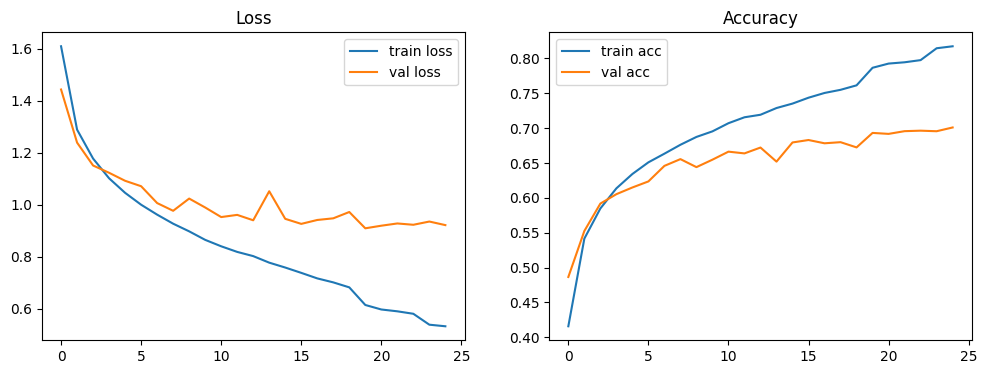

In [75]:
# Tracer courbes d'entraînement
import matplotlib.pyplot as plt

def plot_history(h):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='train loss')
    plt.plot(h.history['val_loss'], label='val loss')
    plt.legend(); plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(h.history['accuracy'], label='train acc')
    plt.plot(h.history['val_accuracy'], label='val acc')
    plt.legend(); plt.title('Accuracy')
    plt.show()

plot_history(history)

In [76]:
# Charger le meilleur modèle sauvegardé et évaluer sur le test
from tensorflow.keras.models import load_model
best = load_model('best_model.h5')
test_loss, test_acc = best.evaluate(x_test, y_test, verbose=2)
print(f'Best model test accuracy: {test_acc}')

# Sauvegarder modèle final si besoin
best.save('final_model.h5')

313/313 - 2s - 6ms/step - accuracy: 0.6932 - loss: 0.9088


Best model test accuracy: 0.6931999921798706


In [57]:
# Astuces pour l'augmentation des données (améliore la généralisation)
# Option 1: ImageDataGenerator (pré-TF 2.x style)
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
#                              horizontal_flip=True)
# datagen.fit(x_train)
# history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
#                     epochs=30, validation_data=(x_val,y_val), callbacks=[checkpoint, earlystop])

# Option 2: couches d'augmentation intégrées (TF 2.3+), à insérer comme première couche du modèle
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),  # retourne horizontalement aléatoirement
#     tf.keras.layers.RandomRotation(0.1),      # rotation aléatoire jusqu'à 10%
#     tf.keras.layers.RandomZoom(0.1),          # zoom aléatoire
# ])
# Puis, au lieu de commencer le Sequential par Conv2D(...), mettre data_augmentation en première position.

# Ces augmentations créent des images nouvelles à partir des originales,
# aidant le modèle à être plus robuste aux transformations réelles.


## Keras Tuner (Grid Search)

In [61]:
# Fonction qui construit un modèle Keras selon les hyperparamètres proposés
from tensorflow.keras import Input

def model_builder(hp):
    # hp.Int: choisir le nombre de filtres (exemple: 16 à 128)
    f1 = hp.Int('filters_1', min_value=16, max_value=128, step=16, default=32)
    f2 = hp.Int('filters_2', min_value=32, max_value=256, step=32, default=64)
    # hp.Choice: choisir la taille du noyau (3 ou 5)
    k1 = hp.Choice('kernel_1', values=[3,5], default=3)
    k2 = hp.Choice('kernel_2', values=[3,5], default=3)

    model_t = tf.keras.Sequential([
        Input(shape=(32,32,3)),
        tf.keras.layers.Conv2D(f1, (k1,k1), activation='relu', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(f2, (k2,k2), activation='relu', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model_t.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return model_t

# Configurer le tuner (Hyperband - efficace pour exploration rapide)
# réduire max_epochs si tu veux une recherche plus courte
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='kt_dir',
    project_name='cifar10_filters_kernel'
)

# Callback pour arrêter tôt les essais qui sur-ajustent
tuner_early = EarlyStopping(monitor='val_loss', patience=3)

# Lancer la recherche (exécution courte — adapte epochs/trials si tu as du temps)
# Attention: ceci peut prendre du temps selon ton hardware.
print('Démarrage de la recherche Keras Tuner — ceci peut être long...')
tuner.search(x_train, y_train, epochs=8, validation_data=(x_val, y_val), callbacks=[tuner_early])

# Récupérer les meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Meilleurs hyperparamètres trouvés:')
print('filters_1 =', best_hps.get('filters_1'))
print('kernel_1 =', best_hps.get('kernel_1'))
print('filters_2 =', best_hps.get('filters_2'))
print('kernel_2 =', best_hps.get('kernel_2'))

# Construire le meilleur modèle et l'entraîner plus longtemps si souhaité
best_model = tuner.hypermodel.build(best_hps)
# Exemple d'entraînement court pour valider (adapter epochs selon ressources)
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystop, reduce_lr])

Trial 30 Complete [00h 07m 05s]
val_loss: 1.4156001806259155

Best val_loss So Far: 0.9587767720222473
Total elapsed time: 01h 30m 50s
Meilleurs hyperparamètres trouvés:
filters_1 = 80
kernel_1 = 3
filters_2 = 32
kernel_2 = 5
Epoch 1/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.3707 - loss: 1.7917 - val_accuracy: 0.2767 - val_loss: 2.4382 - learning_rate: 0.0010
Epoch 2/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4948 - loss: 1.4392 - val_accuracy: 0.5198 - val_loss: 1.4031 - learning_rate: 0.0010
Epoch 3/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5602 - loss: 1.2812 - val_accuracy: 0.5927 - val_loss: 1.1871 - learning_rate: 0.0010
Epoch 4/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6114 - loss: 1.1383 - val_accuracy: 0.6216 - val_loss: 1.1159 - learning_rate: 5.0000e-04
Epoch 5/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.6312 - loss: 1.0794 - val_accuracy: 0.6449 - val_loss: 1.0240 - learning_rat